In [1]:
import pandas as pd

df=pd.read_csv("/content/MoviesDataset.csv")
print(df.to_string())

Output hidden; open in https://colab.research.google.com to view.

In [2]:
df.dropna(inplace = True)
print(df.to_string())

Output hidden; open in https://colab.research.google.com to view.

In [3]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [4]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['duration_value'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)')

In [5]:
print(df.isnull().sum())

show_id           0
type              0
title             0
director          0
cast              0
country           0
date_added        4
release_year      0
rating            0
duration          0
listed_in         0
description       0
duration_value    0
duration_type     0
dtype: int64


In [7]:
for col in df.columns:
    types = df[col].apply(type).nunique()
    if types > 1:
        print(f"⚠️ Column '{col}' has mixed data types")

⚠️ Column 'date_added' has mixed data types


In [8]:
df['director'] = df['director'].astype(str)
df['cast'] = df['cast'].astype(str)
df['country'] = df['country'].astype(str)

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'].fillna(pd.Timestamp('2000-01-01'), inplace=True)

<ipython-input-9-00f3bde92b75>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['date_added'].fillna(pd.Timestamp('2000-01-01'), inplace=True)


In [10]:
df['rating'] = df['rating'].astype(str)
df['rating'].replace('nan', 'Unknown', inplace=True)

<ipython-input-10-4d4b8c8279f2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating'].replace('nan', 'Unknown', inplace=True)


In [11]:
df['duration'] = df['duration'].astype(str)

df['duration_value'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract(r'([a-zA-Z]+)').astype(str)

df['duration_type'].fillna('Unknown', inplace=True)
df['duration_value'].fillna(0, inplace=True)

<ipython-input-11-c9e46d8ae1e8>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration_type'].fillna('Unknown', inplace=True)
<ipython-input-11-c9e46d8ae1e8>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [12]:
for col in df.columns:
    if df[col].apply(type).nunique() > 1:
        print(f"⚠️ Still mixed types in column: {col}")

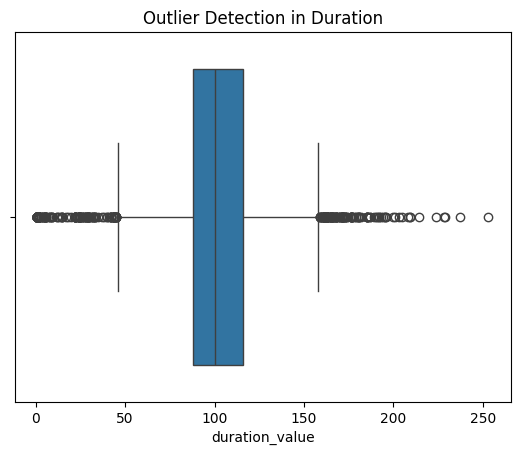

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, duration_value, duration_type]
Index: []


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['duration_value'])
plt.title("Outlier Detection in Duration")
plt.show()

print(df[df['duration_value'] > 300])

In [14]:
print(df['duration_type'].value_counts())


duration_type
min        5185
Season      106
Seasons      41
Name: count, dtype: int64


In [15]:
print(df['country'].value_counts().tail(10))

country
Singapore, Malaysia                                            1
France, Belgium, Luxembourg, Romania, Canada, United States    1
South Africa, Nigeria                                          1
Taiwan, Malaysia                                               1
Uruguay, Argentina, Germany, Spain                             1
United States, United Kingdom, France, Germany, Japan          1
Spain, France, United States                                   1
Indonesia, South Korea, Singapore                              1
Argentina, Uruguay, Serbia                                     1
Spain, United Kingdom, United States                           1
Name: count, dtype: int64


In [16]:
print(df['rating'].value_counts())

rating
TV-MA       1822
TV-14       1214
R            778
PG-13        470
TV-PG        431
PG           275
TV-G          84
TV-Y7         76
TV-Y          76
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64


In [17]:
for col in ['title', 'description', 'cast', 'director']:
    print(f"{col}: Empty strings = {sum(df[col].str.strip() == '')}")

title: Empty strings = 0
description: Empty strings = 0
cast: Empty strings = 0
director: Empty strings = 0


In [18]:
print(df['release_year'].min(), df['release_year'].max())

1942 2021


In [19]:
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


In [20]:
df.info()
df.head()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         5332 non-null   object        
 1   type            5332 non-null   object        
 2   title           5332 non-null   object        
 3   director        5332 non-null   object        
 4   cast            5332 non-null   object        
 5   country         5332 non-null   object        
 6   date_added      5332 non-null   datetime64[ns]
 7   release_year    5332 non-null   int64         
 8   rating          5332 non-null   object        
 9   duration        5332 non-null   object        
 10  listed_in       5332 non-null   object        
 11  description     5332 non-null   object        
 12  duration_value  5332 non-null   float64       
 13  duration_type   5332 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(11)
memory

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_type
count,5332,5332,5332,5332,5332,5332,5332,5332.000000,5332,5332,5332,5332,5332.000000,5332
unique,5332,2,5330,3945,5200,604,NaN,NaN,14,198,335,5321,NaN,3
top,s8807,Movie,22-Jul,"Raúl Campos, Jan Suter",Samuel West,United States,NaN,NaN,TV-MA,94 min,"Dramas, International Movies",When pretty new neighbor Seema falls for their...,NaN,min
freq,1,5185,2,18,10,1846,NaN,NaN,1822,135,336,2,NaN,5185
mean,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-23 19:22:22.235558912,2012.742123,NaN,NaN,NaN,NaN,99.922543,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,2000-01-01 00:00:00,1942.000000,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-06 00:00:00,2011.000000,NaN,NaN,NaN,NaN,88.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-16 00:00:00,2016.000000,NaN,NaN,NaN,NaN,100.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2020-06-26 06:00:00,2018.000000,NaN,NaN,NaN,NaN,116.000000,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-24 00:00:00,2021.000000,NaN,NaN,NaN,NaN,253.000000,NaN


In [21]:
df.sort_values(by='release_year', ascending=False).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_type
1468,s1469,Movie,What Happened to Mr. Cha?,Kim Dong-kyu,"Cha In-pyo, Cho Dal-hwan, Song Jae-ryong",South Korea,2021-01-01,2021,TV-MA,102 min,"Comedies, International Movies","With the peak of his career long behind him, a...",102.0,min
1432,s1433,TV Show,The Idhun Chronicles,Maite Ruiz De Austri,"Michelle Jenner, Itzan Escamilla, Sergio Mur, ...",Spain,2021-01-08,2021,TV-14,2 Seasons,"Anime Series, International TV Shows, Spanish-...",A boy suddenly orphaned fights his parents' ki...,2.0,Seasons
1424,s1425,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...","Canada, United States, Cayman Islands",2021-01-08,2021,TV-Y7,85 min,"Children & Family Movies, Comedies","On the eve of his 21st birthday, an adored pri...",85.0,min
1412,s1413,Movie,Wish You,Sung Do-jun,"Kang In-soo, Lee Sang, Soo-bin",South Korea,2021-01-15,2021,TV-PG,102 min,"Dramas, International Movies, LGBTQ Movies","Singing and dreaming together, a talented sing...",102.0,min
1411,s1412,Movie,What Would Sophia Loren Do?,Ross Kauffman,"Nancy ""Vincenza Careri"" Kulik, Sophia Loren",United States,2021-01-15,2021,TV-14,32 min,Documentaries,"In this delightful short documentary, an Itali...",32.0,min


In [22]:
df.groupby('release_year')['show_id'].count()

,show_id
release_year,
1942,1
1944,1
1945,1
1946,1
1947,1
...,...
2017,657
2018,648
2019,519


In [23]:
df[df['type'] == 'Movie']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_value,duration_type
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0,min
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0,min
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0,min
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166.0,min
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,103.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96.0,min
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,min
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,min


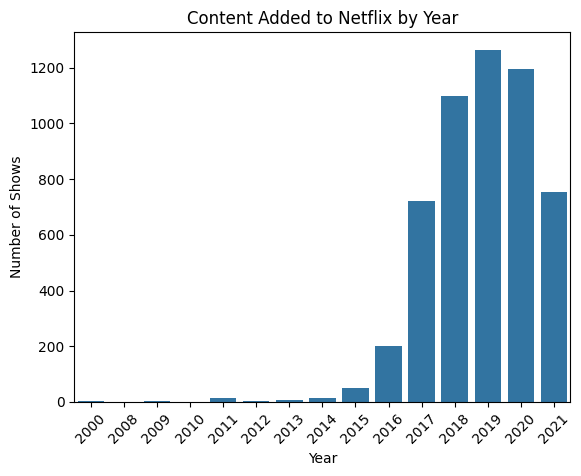

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

df['year_added'] = df['date_added'].dt.year

sns.countplot(data=df, x='year_added', order=sorted(df['year_added'].dropna().unique()))
plt.xticks(rotation=45)
plt.title("Content Added to Netflix by Year")
plt.ylabel("Number of Shows")
plt.xlabel("Year")
plt.show()

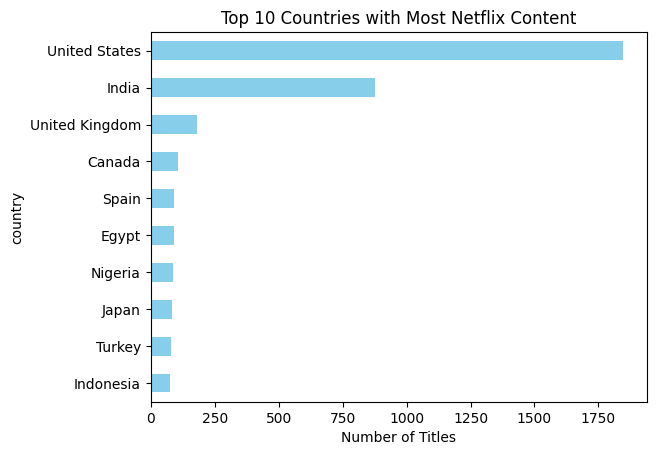

In [25]:
top_countries = df['country'].value_counts().head(10)

top_countries.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()

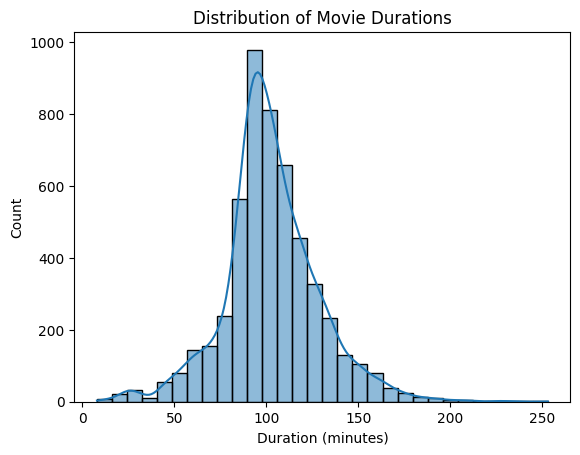

In [26]:
movies_df = df[df['type'] == 'Movie']
sns.histplot(data=movies_df, x='duration_value', bins=30, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.show()